In [3]:
from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
def rebin(df_in):
    # rebin values for each country
    countries = set(df_in['Country/Region'])

    xlength = len(countries)
    ylength = df_in.shape[1] - 4

    data = np.ones((ylength, xlength), dtype=float)
    df = pd.DataFrame(data, index=np.arange(ylength), columns=countries)

    for row in df_in.to_numpy():
        country = row[1]

        for i, n in enumerate(row[4:]):
            df[country][i] += n

    return df

In [5]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [9]:
df_confirmed = rebin(pd.read_csv(confirmed_url))
df_deaths = rebin(pd.read_csv(deaths_url))
df_recovered = rebin(pd.read_csv(recovered_url))

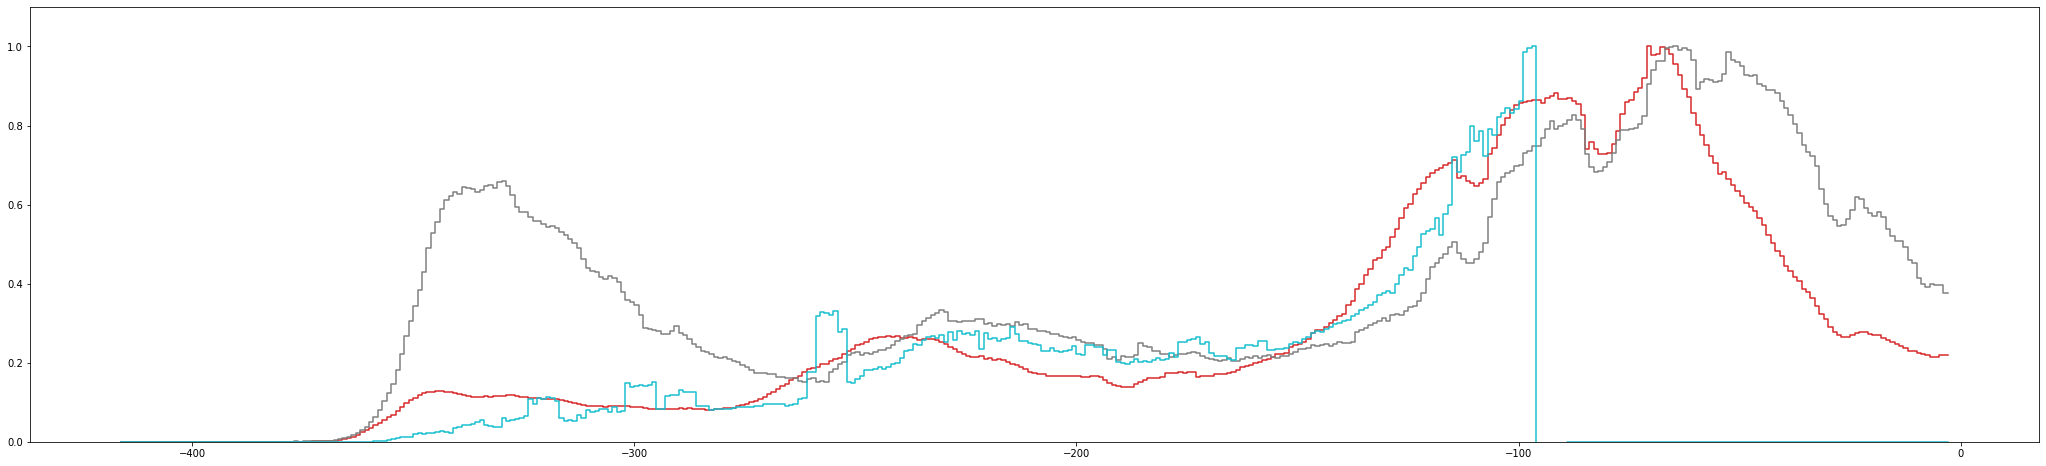

In [62]:
#country = 'Germany'
#country = 'United Kingdom'
country = 'US'

x = df_confirmed[country].index - df_confirmed[country].index[-1]
y_confirmed = df_confirmed[country].diff().rolling(7, center=True).mean()
y_deaths = df_deaths[country].diff().rolling(7, center=True).mean()
y_recovered = df_recovered[country].diff().rolling(7, center=True).mean()

y_confirmed_max = np.max(y_confirmed)
y_deaths_max = np.max(y_deaths)
y_recovered_max = np.max(y_recovered)

fig, ax = plt.subplots()

plt.step(x, y_confirmed / y_confirmed_max, linestyle='-', color='tab:red')
plt.step(x, y_deaths / y_deaths_max, linestyle='-', color='tab:gray')
plt.step(x, y_recovered / y_recovered_max, linestyle='-', color='tab:cyan')

#ax.set_ylim([1, 5e4])
ax.set_ylim([0, 1.1])

fig = plt.gcf()
fig.set_size_inches(36, 8)
